# Basic Image Access Operations

* Author: Johannes Maucher
* Last Update: 28th January 2021

## Required modules

There are several libraries for image processing in python. The following libraries will be frequently applied througout this lecture:

* Python bindings of  [OpenCV](http://opencv.org/). OpenCV is the most comprehensive open-source Library for computer vision. It includes several hundreds of algorithms, ranging from basic image- and video processing to advanced machine learning algorithms for pattern recognition,
    
* [Scikits Image](http://scikit-image.org/) provides a collection of algorithms for image processing (open-source).

* The Python [Imaging Library (PIL)](https://pillow.readthedocs.io/en/stable/reference/) provides standard image processing functions, e.g. for filtering and transcoding. 

* [Matplotlib](https://matplotlib.org) is a python 2D plotting library. 

* [Numpy](https://numpy.org) is the fundamental package for scientific computing with Python.

* [SciPy](http://docs.scipy.org/doc/) is an open-source software for mathematics, science, and engineering. The SciPy library depends on Numpy, which provides convenient and fast N-dimensional array manipulation. Image processing functionality is encapsulated in the Scipy package ndimage.


In [2]:
%matplotlib inline
from PIL import Image
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import os
import cv2

In [3]:
cv2.__version__

'4.5.1'

## Read and open image

Read File from Directory, print image metadata and display the image with Matplotlibs plotting function

### Option 1: Read image with matplotlib

<class 'numpy.ndarray'>
Shape of numpy array : 	 (388, 599, 3)


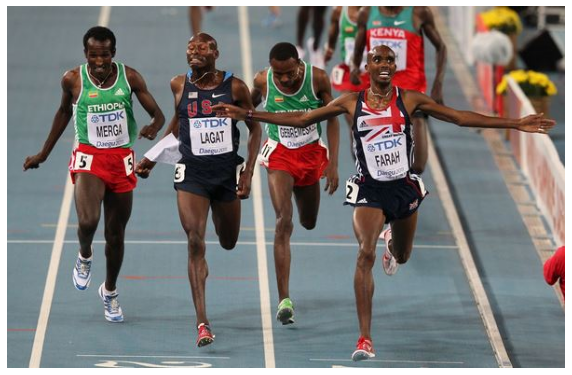

In [4]:
imgpath='../Data/mo.png'
m_im=plt.imread(imgpath)
m_im_new=m_im[:,:,[2,1,0]] #swap color channels
print(type(m_im))
print("Shape of numpy array : \t", m_im.shape)
plt.figure(figsize=(10,8))
plt.axis("off") #switch off numbered axis
plt.imshow(m_im_new)
plt.show()

### Option 2: Read image with PIL

Format: 	 PNG
Size  : 	 (599, 388)
Mode  : 	 RGB
Shape of numpy array : 	 (388, 599, 3)
<class 'PIL.PngImagePlugin.PngImageFile'>


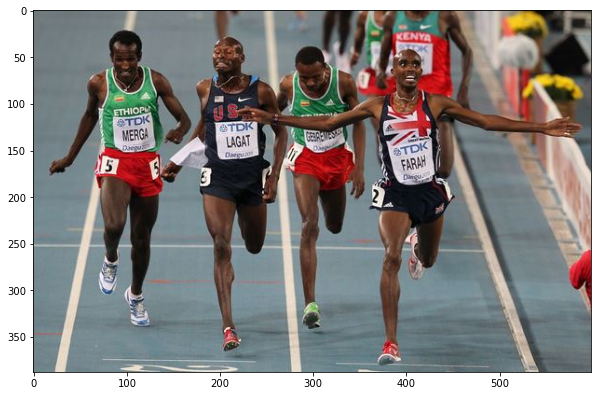

In [6]:
pil_im = Image.open(imgpath)
print("Format: \t",pil_im.format)
print("Size  : \t",pil_im.size) 
print("Mode  : \t",pil_im.mode)
np_im=np.array(pil_im)   
np_im_new=np_im[:,:,[2,1,0]] #swap color channels
print("Shape of numpy array : \t", np_im_new.shape)
print(type(pil_im))
plt.figure(figsize=(10,8))
plt.imshow(np_im_new)
plt.show()

Read and display image as greyscale

Shape of numpy array : 	 (388, 599)


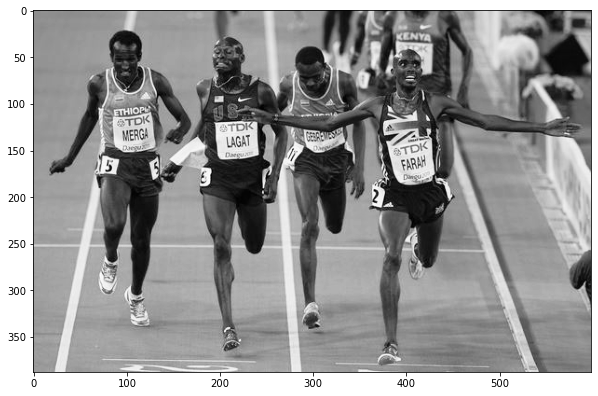

In [7]:
pil_im_grey = Image.open(imgpath).convert('L')
np_im_grey=np.array(pil_im_grey)
print("Shape of numpy array : \t", np_im_grey.shape)
plt.figure(figsize=(10,8))
plt.imshow(np_im_grey,cmap='Greys_r')
plt.show()

### Read all images in specified directory

The python [os package](http://docs.python.org/2/library/os.html) provides miscellaneous operating system interfaces. Using this package it is possible to access a set of files, which is defined by a partiular pattern. In the following example all .jpg files of the given directory are accessed and displayed. In the third line a list is created, which contains all file- and pathnames, which match the specified pattern.

../Data/66obj/images/image108.JPG


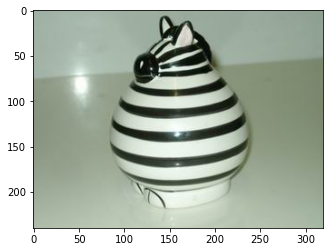

../Data/66obj/images/image134.JPG


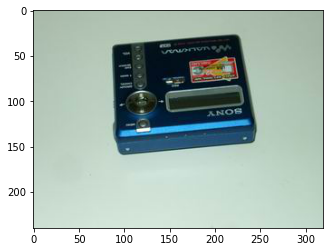

../Data/66obj/images/image120.JPG


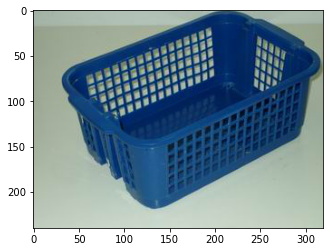

../Data/66obj/images/image068.JPG


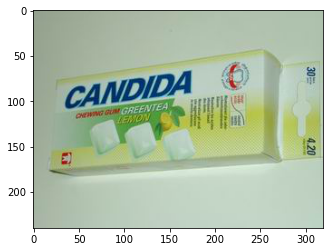

../Data/66obj/images/image040.JPG


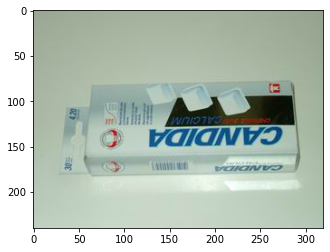

../Data/66obj/images/image054.JPG


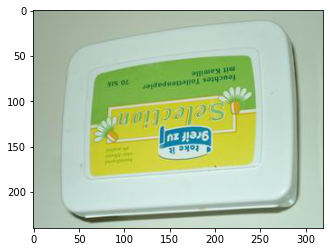

../Data/66obj/images/image083.JPG


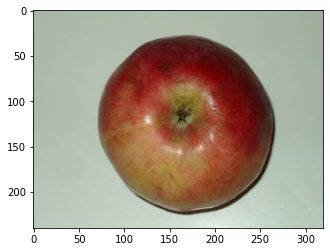

../Data/66obj/images/image097.JPG


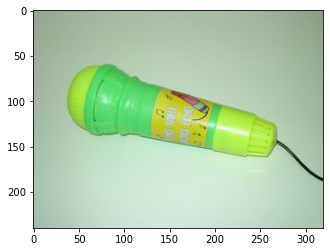

../Data/66obj/images/image242.JPG


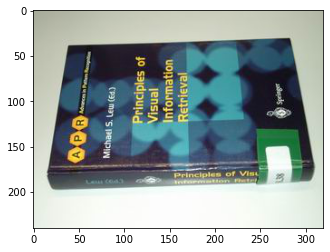

../Data/66obj/images/image256.JPG


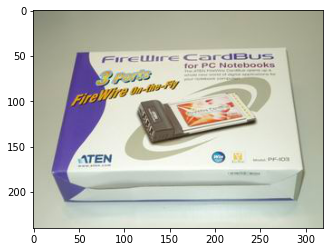

In [8]:
imageformat=".JPG"
path="../Data/66obj/images"
imfilelist=[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imageformat)]
for el in imfilelist[:10]:
        print(el)
        image = Image.open(el)
        image=np.array(image)
        plt.imshow(image)
        plt.show()

### Option 3: Read Images using OpenCv
[OpenCV](http://opencv.org/) is the most comprehensive open source library for video- and imageprocessing. OpenCV is implemented in C++, bindings for other languages exist. We apply the OpenCV python bindings. After installing OpenCV it can be accessed by importing cv2

In [9]:
import cv2

4.5.1
<class 'numpy.ndarray'>


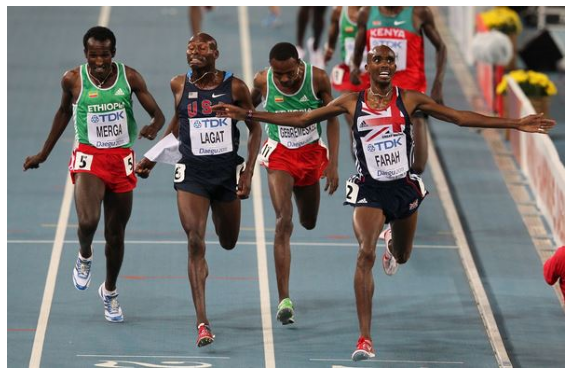

In [5]:
print(cv2.__version__)
#cv2.namedWindow("Image")
image = cv2.imread(imgpath)
print(type(image))
plt.figure(figsize=(10,8))
plt.axis("off")
plt.imshow(image)
plt.show()

In [11]:
image[:5,:5,0]

array([[112, 112, 112, 112, 112],
       [112, 112, 112, 112, 112],
       [112, 112, 112, 112, 112],
       [112, 112, 112, 112, 112],
       [111, 111, 111, 111, 111]], dtype=uint8)

In [12]:
m_im_new=m_im[:,:,[2,1,0]]

In [13]:
m_im_new[:5,:5,0]

array([[0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 ],
       [0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 ],
       [0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 ],
       [0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 , 0.4392157 ],
       [0.43529412, 0.43529412, 0.43529412, 0.43529412, 0.43529412]],
      dtype=float32)

## Capture video from camera
Using OpenCV videos can be captured, processed and displayed. Within a video sequence each frame is read and stored in a 2D Numpy array. In this representation frames of a video sequence can be processed in the same way as single images

In [14]:
try:
    cam = cv2.VideoCapture(0) #Index in brackets determine the camera. If there is only one camera available the index must be 0
    while True:
        img2 = cam.read()[1]
        cv2.imshow("Video",img2)
        if cv2.waitKey(1) == 27: # Stop if ESC is pressed
                break
except:
    print("No camera available")
cv2.destroyAllWindows()

No camera available


## Capture Video from Disk
Specify location of video file and open VideoCapture object. Get video properties and display them. Read video frame by frame.

In [ ]:
file="../Data/4p-c1.avi"
cam = cv2.VideoCapture(file)
print("Video Properties:")
#print "\t Width: ",cam.get(cv2.CV_CAP_PROP_FRAME_WIDTH)
#print "\t Height: ",cam.get(cv2.CV_CAP_PROP_FRAME_HEIGHT)
#print "\t FourCC: ",cam.get(cv2.CV_CAP_PROP_FOURCC)
#print "\t Framerate: ",cam.get(cv2.CV_CAP_PROP_FPS)
NofFrames=cam.get(7)
print("\t Number of Frames: ",NofFrames)
frameCount=0
while True and frameCount<NofFrames:
    img2 = cam.read()[1]
    frameCount+=1
    try:
        cv2.imshow("Video",img2)
    except:
        print("Frame can not be displayed")
    if cv2.waitKey(33) == 27: 
        break
cam.release()
cv2.destroyAllWindows()